In [1]:
from tensorflow import keras
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DATA_FILE = "x.npy"

In [3]:
x = np.load(DATA_FILE)
img_shape = x.shape[1:]

In [9]:
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

keras.utils.get_custom_objects().update({"Sampling": Sampling})

# Non-Variational Comparisson

In [44]:
non_variational_models = []

for file_name in os.listdir("../models"):
    # if "V" != file_name[0]:
    model = "../models/" + file_name
    non_variational_models.append(model)

../models/NB_R_7_384.h5
../models/NB_S_7_384.h5
../models/V_S_7_384.h5
../models/S_7_384.h5
../models/R_7_384.h5
../models/SB_S_7_384.h5
../models/relu_SB_S_7_384.h5
../models/relu_SB_R_7_384.h5
../models/V_R_7_384.h5
../models/SB_R_7_384.h5


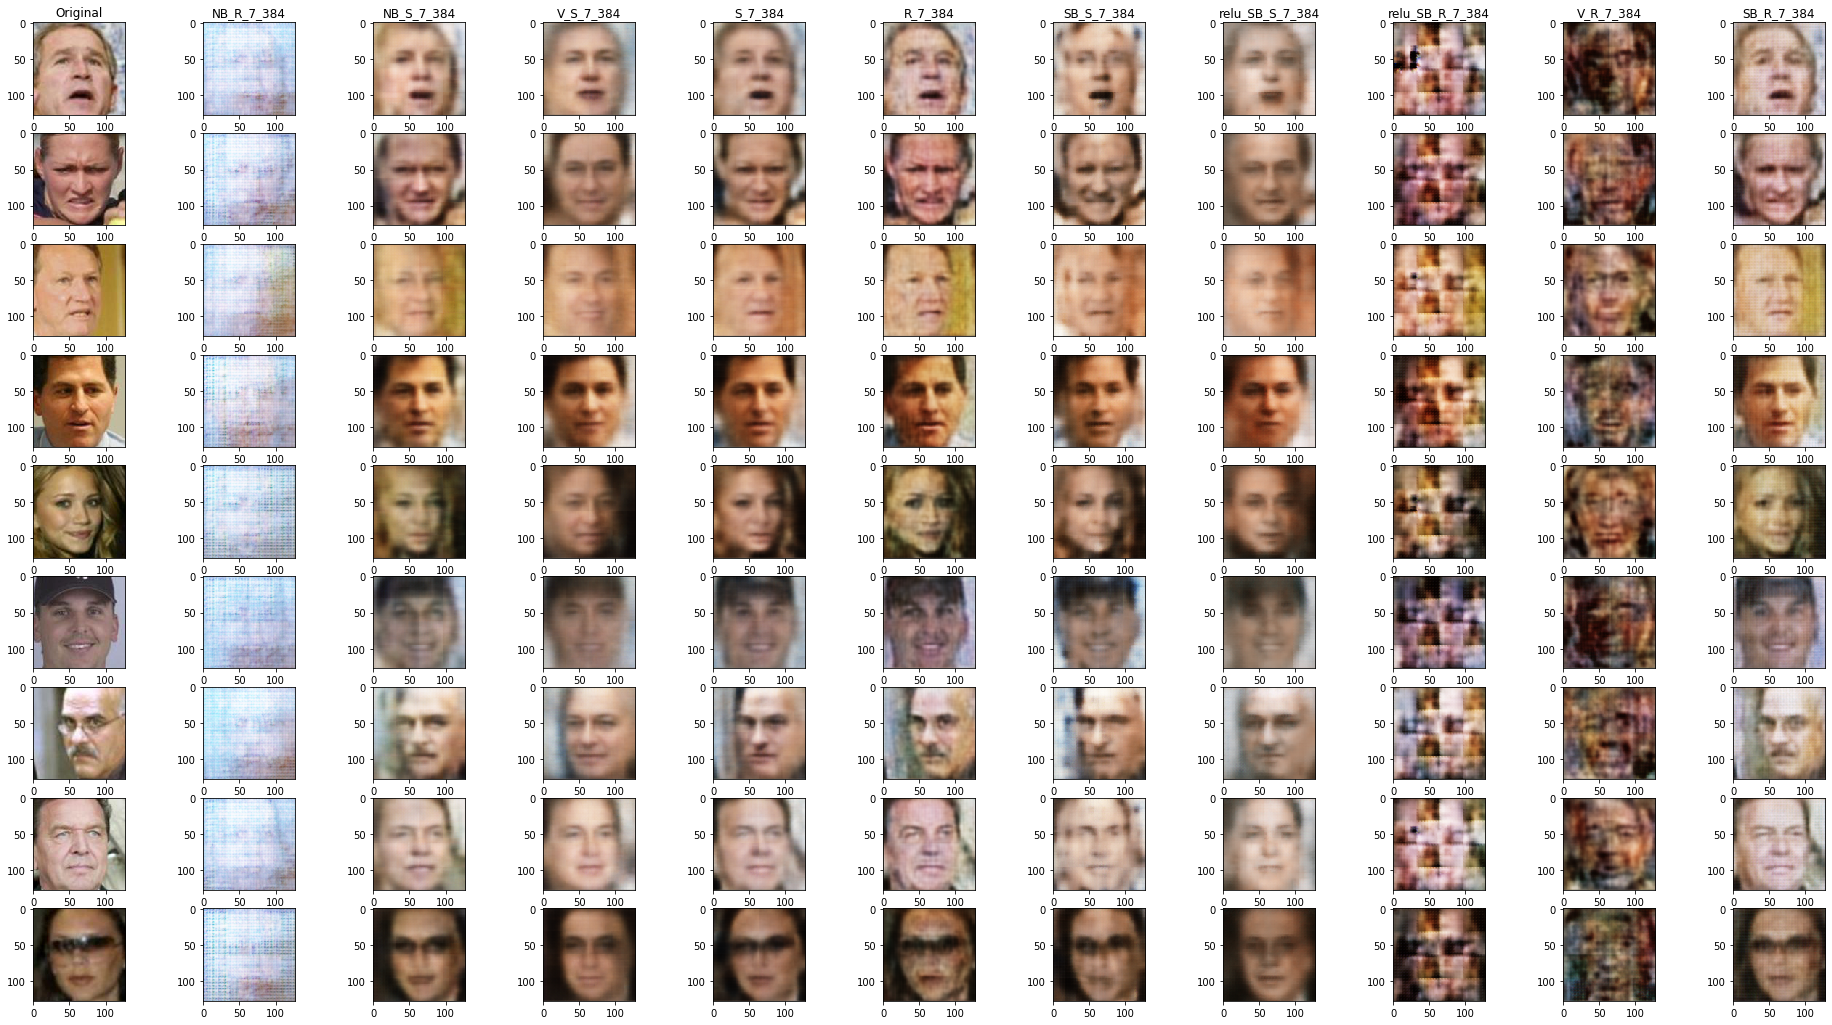

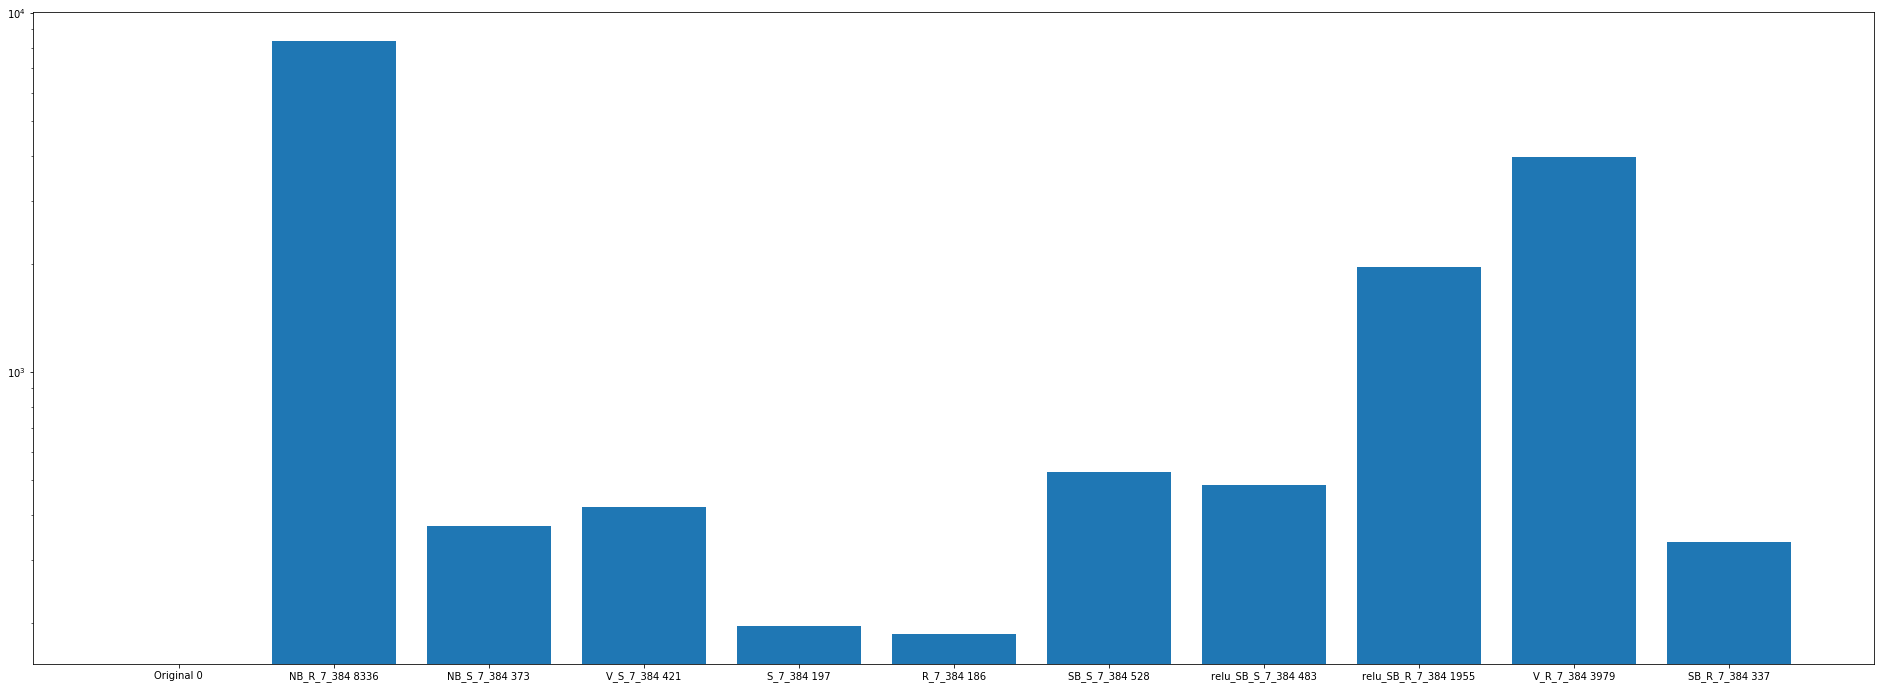

In [46]:
n_rows = 9

inds = np.random.randint(0, len(x), n_rows)
display_images = x[inds]

img_dict = {"Original": display_images}

for model_file in non_variational_models:
    print(model_file)
    model = keras.models.load_model(model_file)
    model_name = model_file.split("/")[-1].split(".")[0]
    img_dict[model_name] = model.predict(display_images)

fig, axs = plt.subplots(n_rows, len(non_variational_models) + 1)

titles = []
titles.extend(list(img_dict.keys()))

total_errors = np.zeros(len(titles))

for r, row in enumerate(axs):
    imgs = [img_dict[key][r] for key in titles]
    for c, ax in enumerate(row):
        original = display_images[r].astype(float)
        img = imgs[c].astype(float)

        error = ((original - img)**2).sum()
        total_errors[c] += error

        ax.imshow(img)
        if r == 0:
            ax.set_title(titles[c])


fig.set_size_inches(len(titles)*3, n_rows*2)
fig.savefig("../figures/non_variational.png")
fig.show()

fig, ax = plt.subplots()

errors = [err/n_rows for err in total_errors]
labels = []
for i, title in enumerate(titles):
    label = "%s %.0f" % (title, errors[i])
    labels.append(label)
ax.bar(np.arange(len(titles)), errors, tick_label=labels)
ax.set_yscale("log")
fig.set_size_inches(len(titles)*3, 12)
fig.savefig("../figures/non_variational.png")
fig.show()


In [18]:
stacked = keras.models.load_model("../models/S_7_384.h5")
recursive = keras.models.load_model("../models/R_7_384.h5")

display_images = x[:10]

reconstructions = recursive.predict(display_images)
basic_reconstructions = stacked.predict(display_images)

fig, axs = plt.subplots(5, 3)

titles = ["Original", "Stacked", "Recursive"]

for r, row in enumerate(axs):
    imgs = [display_images[r], basic_reconstructions[r], reconstructions[r]]
    for c, ax in enumerate(row):
        img = imgs[c].astype(float)
        ax.imshow(img)
        if r == 0:
            ax.set_title(titles[c])

fig.set_size_inches(6, 9)
fig.savefig("../figures/7_384.png")
fig.show()



[[[[0.50191325 0.44434294 0.38581297]
   [0.493538   0.42563263 0.372979  ]
   [0.47939286 0.4204537  0.3632118 ]
   ...
   [0.7702645  0.6494106  0.5455766 ]
   [0.7424937  0.6468084  0.5501085 ]
   [0.69543153 0.59623533 0.5209522 ]]

  [[0.4996387  0.4314307  0.37549406]
   [0.5049572  0.4393348  0.3797997 ]
   [0.49682513 0.41943887 0.33495474]
   ...
   [0.8009634  0.6824588  0.5591513 ]
   [0.78417283 0.6783574  0.5557966 ]
   [0.7107978  0.61444443 0.5240346 ]]

  [[0.5208186  0.43889964 0.37643358]
   [0.51682687 0.43086416 0.35107145]
   [0.5221925  0.40980086 0.31483188]
   ...
   [0.8289591  0.6952633  0.5656562 ]
   [0.82398945 0.6866625  0.5493473 ]
   [0.73066175 0.6251934  0.5249136 ]]

  ...

  [[0.43226948 0.377916   0.31048313]
   [0.44152215 0.36316684 0.3208079 ]
   [0.4512076  0.36700594 0.3031517 ]
   ...
   [0.71736676 0.44729194 0.27782348]
   [0.7366083  0.47590446 0.29883105]
   [0.65836805 0.4804799  0.33276874]]

  [[0.42061362 0.3852533  0.33131704]
   [0.4

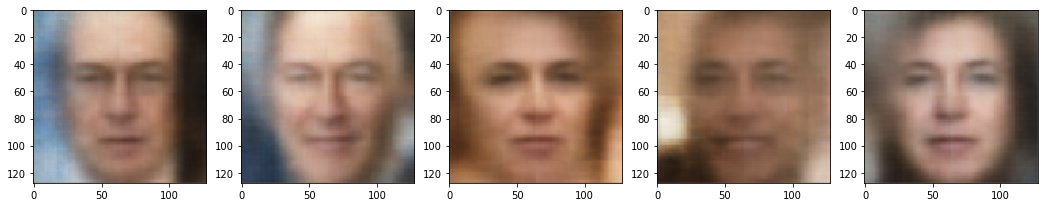

In [51]:
variational = keras.models.load_model("../models/V_S_7_384.h5").layers[1]

vecs = np.random.randn(5, 1, 1, 384)
imgs = variational.predict(vecs)

fig, axs = plt.subplots(1, 5)

for i, ax in enumerate(axs):
    ax.imshow(imgs[i].astype(float))

fig.set_size_inches(18, 12)
fig.savefig("../figures/V_S_7_384.png")
fig.show()



In [ ]:
encoder, decoder = keras.models.load_model("../models/V_S_7_384.h5").layers

vecs = np.random.randn(5, 1, 1, 384)
imgs = variational.predict(vecs)

fig, axs = plt.subplots(1, 5)

for i, ax in enumerate(axs):
    ax.imshow(imgs[i].astype(float))

fig.set_size_inches(18, 12)
fig.savefig("../figures/V_S_7_384.png")
fig.show()

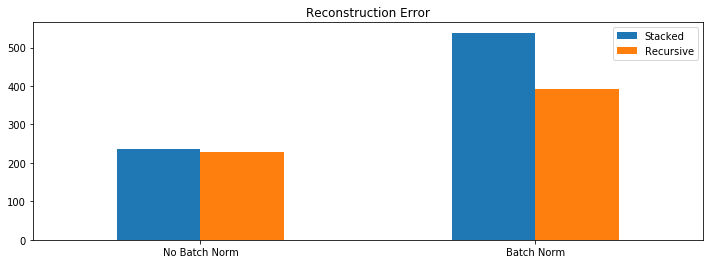

In [81]:
import pandas as pd

model_names = [
    "S_7_384",
    "R_7_384",
    "SB_S_7_384",
    "SB_R_7_384"
]

errs = {
    "Stacked": [],
    "Recursive": []
}
index = ["No Batch Norm", "Batch Norm"]

inds = np.random.randint(0, len(x), 100)
imgs = x[inds]

errors = []

for name in model_names:
    model_file = "../models/%s.h5" % name
    model = keras.models.load_model(model_file)
    preds = model.predict(imgs)
    err = ((preds - imgs)**2 / preds.shape[0]).sum()
    if "S_" in name:
        errs["Stacked"].append(err)
    else:
        errs["Recursive"].append(err)

df = pd.DataFrame(errs)
df.index = index
df.plot.bar(rot=0, figsize=(12, 4))

plt.title("Reconstruction Error")
plt.savefig("../figures/bar_chart.png")
plt.show()
# print(errors)

# # fig, ax = plt.subplots()

# # errors = [err/n_rows for err in total_errors]
# labels = []
# for i, title in enumerate(model_names):
#     label = "%s %.0f" % (title, errors[i])
#     labels.append(label)


# plt.bar(np.arange(len(labels)) * n + n, errors, tick_label=labels, width=0.5)

# foo(["S_7_384", "R_7_384"], 1)
# foo(["SB_S_7_384", "SB_R_7_384"], 2)

# # ax.set_yscale("log")
# # fig.set_size_inches(12, 4)
# plt.savefig("../figures/bar_chart.png")
# plt.show()